In [1]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pathlib import Path
import seaborn as sns
import numpy as np
sns.set_context('talk')
sns.set_style('darkgrid')


In [2]:
def binarize_labels(df):
    df.iloc[:, :3] = df.iloc[:, :3].round()
    return df

In [3]:
dfs = []
for p in Path('annot_round1').glob('*/batch*.tsv'):
# for p in Path('annot_round1').glob('deu_Latn/batch*.tsv'):
    df = pd.read_csv(p, sep='\t') 
    if p.parent.name == 'deu_Latn' and p.name == 'batch0.tsv':        
        print('Binarization for', p)
        df = binarize_labels(df)
    elif p.parent.name == 'gla_Latn' and p.name == 'batch0.tsv':
        # Laurie didn't explicitly labeled if the language was not correct        
        print('For gla_Latn empty "lang correct" means incorrect lang')        
        df.iloc[:,2] = df.iloc[:,2].fillna(0)
    df = df.rename(columns = {c: c.split('?')[0] for c in df.columns})
    if any(df[c].isnull().all() for c in df.columns if 'lang' in c):
        continue
    print(p, (~df['lang correct'].isnull()).sum(), 
          *(df[c].value_counts(dropna=False).to_dict() for c in ['lang correct', 'porn', 'unnatural']))
    df['path'] = str(p)
    df['lang'] = p.parent.name
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True).sort_values(by='lang')
df.sample(10)

annot_round1/nno_Latn/batch0.tsv 200 {1: 186, 0: 14} {nan: 199, 1.0: 1} {nan: 194, 1.0: 6}
annot_round1/ell_Grek/batch0.tsv 200 {1: 200} {nan: 200} {nan: 193, 1.0: 7}
annot_round1/fin_Latn/batch0.tsv 200 {1: 200} {nan: 198, 1.0: 2} {nan: 191, 1.0: 9}
annot_round1/ben_Beng/batch0.tsv 199 {1.0: 199, nan: 1} {nan: 197, 1.0: 3} {nan: 200}
For gla_Latn empty "lang correct" means incorrect lang
annot_round1/gla_Latn/batch0.tsv 200 {1.0: 178, 0.0: 21, 11.0: 1} {nan: 200} {nan: 194, 1.0: 6}
Binarization for annot_round1/deu_Latn/batch0.tsv
annot_round1/deu_Latn/batch0.tsv 200 {1.0: 196, 0.0: 3, 2.0: 1} {nan: 197, 1.0: 2, 0.0: 1} {0.0: 191, nan: 5, 1.0: 4}
annot_round1/spa_Latn/batch0.tsv 200 {1: 200} {nan: 197, 1.0: 3} {nan: 181, 1.0: 19}
annot_round1/eng_Latn/batch0.tsv 200 {1: 200} {nan: 197, 1.0: 3} {nan: 173, 1.0: 27}
annot_round1/ast_Latn/batch0.tsv 200 {1: 138, 0: 62} {nan: 200} {nan: 142, 1.0: 58}
annot_round1/nld_Latn/batch0.tsv 200 {1: 200} {nan: 197, 1.0: 3} {nan: 190, 1.0: 10}
annot

,porn,unnatural,lang correct,text_show,id,path,lang,Unnamed: 5,comment
1363,NaN,NaN,1.0,"Arjipova, Irina (1925-2010) Mezzosoprano rusa,...",bba52b2bfb5c718dee16154d4df28a06,annot_round1/spa_Latn/batch0.tsv,spa_Latn,NaN,NaN
4117,NaN,NaN,1.0,Onkologia Rekomendacje w nowotworach leczonych...,41a3e24eb17a0fd17c0468191c65261e,annot_round1/pol_Latn/batch0.tsv,pol_Latn,NaN,NaN
3661,NaN,NaN,1.0,Anne karnında bebeğin cinsiyeti nasıl anlaşılı...,05898676e23883ac9f835b102e41bb95,annot_round1/tur_Latn/batch0.tsv,tur_Latn,NaN,NaN
1669,NaN,1.0,1.0,Pezós Pezós ye un conceyu y una parroquia d'As...,3a445144e630274cc88f2a762fc2488f,annot_round1/ast_Latn/batch0.tsv,ast_Latn,NaN,NaN
1118,NaN,0.0,1.0,Still- und Ernährungsberatung gehört zur Betre...,4c80ac6c4501eb937af2444131a4d10b,annot_round1/deu_Latn/batch0.tsv,deu_Latn,NaN,NaN
1057,NaN,0.0,1.0,Frühling der Seele Aufschrei im Schlaf; durch ...,a4f014b90e557c2d81a8d53a11b5db34,annot_round1/deu_Latn/batch0.tsv,deu_Latn,NaN,NaN
1448,NaN,1.0,1.0,"feasible complications in the body, it is best...",85882a6e1f16548db4c3c64242d957b7,annot_round1/eng_Latn/batch0.tsv,eng_Latn,NaN,NaN
1828,NaN,NaN,1.0,De Arbeitsgemeinschaft Generalgouvernement (19...,6348565ab819456b1e9ea04959ac20c3,annot_round1/nld_Latn/batch0.tsv,nld_Latn,NaN,NaN
2004,NaN,NaN,1.0,हमारे वीर हनुमान के अनुसार सरकार ने सुनियोजित ...,311b0776a5d73f166755dd32314ca708,annot_round1/hin_Deva/batch0.tsv,hin_Deva,NaN,NaN
2442,NaN,1.0,1.0,"Flott budsjetthotell, 2 kvartaler fra stranden...",bb83ada9a2b42536c13f6db794b095ab,annot_round1/nob_Latn/batch1.tsv,nob_Latn,NaN,NaN


In [4]:
df = df.iloc[:,:7]

In [5]:
df = df.dropna(subset=['lang correct'])
print(len(df), 'examples with language annotations')

4795 examples with language annotations


In [6]:
df.iloc[:,:3].value_counts(dropna=False).reset_index()

,porn,unnatural,lang correct,count
0,NaN,NaN,1.0,3838
1,NaN,1.0,1.0,388
2,NaN,0.0,1.0,189
3,0.0,0.0,1.0,149
4,NaN,1.0,0.0,63
5,NaN,NaN,0.0,56
6,0.0,1.0,1.0,49
7,1.0,NaN,1.0,45
8,1.0,1.0,1.0,10
9,NaN,0.0,0.0,2


In [7]:
df.iloc[:,:3] = df.iloc[:,:3].fillna(False).replace(1.0, True).replace(0.0, False)
df.iloc[:,:3].value_counts(dropna=False).reset_index()

/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_85329/3709598210.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:,:3] = df.iloc[:,:3].fillna(False).replace(1.0, True).replace(0.0, False)
/var/folders/mw/3x2qsh0s2yb5krjrx4yh7drh0000gn/T/ipykernel_85329/3709598210.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2600    False
2728    False
2729    False
2730    False
2731    False
        ...  
4328    False
4327    False
4326    False
4336    False
4347    False
Name: porn, Length: 4795, dtype: bool' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:3] = df.iloc[:,:3].fillna(False).replace(1.0, True).replace(0.

,porn,unnatural,lang correct,count
0,False,False,True,4177
1,False,True,True,437
2,False,True,False,64
3,False,False,False,58
4,True,False,True,45
5,True,True,True,10
6,False,False,11.0,2
7,False,False,2.0,1
8,True,False,False,1


In [8]:
wrong_labels = ~df.iloc[:,:3].isin({True, False}).all(axis=1)
print(wrong_labels.sum(), 'examples with wrong labels:')
df[wrong_labels]

3 examples with wrong labels:


,porn,unnatural,lang correct,text_show,id,path,lang
1065,False,False,2.0,Remi Hotel - Alanya Guzelyali Caddesi Nergis S...,5eb03a22101cd34008bf5b98f834ea22,annot_round1/deu_Latn/batch0.tsv,deu_Latn
853,False,False,11.0,Niall Mòr MacMuireadhaigh Bha Niall Mòr MacMui...,9f21e4e870fd4e3a790e071dc0902aff,annot_round1/gla_Latn/batch0.tsv,gla_Latn
2563,False,False,11.0,Farlig begjær Farlig begjær (originaltittel: F...,e5d0ce9b625d9cc37aafbf48ce7ef48b,annot_round1/nob_Latn/batch1.tsv,nob_Latn


In [9]:
df.drop(index=df[wrong_labels].index, inplace=True)
print(len(df), 'examples after removing wrong labels')

4792 examples after removing wrong labels


In [10]:
ldf = pd.read_csv('../warc2text-runner/stats/_langs/langs_HPLTv2.tsv', sep='\t')
lang_col = 'v2 Language Code (ISO 693-3+script)'
df = df.merge(ldf[[lang_col, 'Language Name']], left_on='lang', right_on=lang_col, how='left')

df.drop(columns=lang_col, inplace=True)

In [11]:
def ci(s):
    n = len(s)
    m = s.mean()
    d = np.sqrt(m*(1-m) / n)
    l,r = max(0,m-2*d), min(1.0,m+2*d)
    ci = '---' if m*n < 15 or (1-m)*n < 15 else f'{int(100*l)}-{int(100*r)}'
    return f'{int(m*100):d} ({ci})'

In [13]:
pdf = df.drop(columns=['text_show','id'])
qdf = pdf.drop(columns=['lang','path']).groupby(['Language Name']).agg(lambda s: ci(s)).reset_index()
qdf.index += 1
qdf.to_csv('results_per_lang.tsv', sep='\t', index=False)
qdf

,Language Name,porn,unnatural,lang correct
1,Arabic,0 (---),9 (5-13),100 (---)
2,Asturian,0 (---),28 (22-35),69 (62-75)
3,Bengali,1 (---),0 (---),100 (---)
4,Catalan,0 (---),14 (9-19),99 (---)
5,Chinese,0 (---),25 (18-31),99 (---)
6,Czech,0 (---),9 (4-13),100 (---)
7,Dutch,1 (---),5 (---),100 (---)
8,English,1 (---),13 (8-18),100 (---)
9,Finnish,1 (---),4 (---),100 (---)
10,German,1 (---),2 (---),98 (---)


In [13]:
print(pdf.lang.nunique(), pdf.path.nunique())

22 24


In [38]:
import subprocess

def git_shortlog(file_path):
    return subprocess.check_output(f"git shortlog -s -n HEAD {file_path} | cut -f 2 | grep -vi 'Arefev'", shell=True, text=True).strip()

pdf = df.drop(columns=['text_show','id'])
qdf = pdf.drop(columns=['Language Name']).groupby(['path','lang']).agg(lambda s: ci(s)).reset_index().sort_values(by='lang')
qdf['annotator'] = qdf.path.apply(git_shortlog)
df.merge(qdf['path annotator'.split()], on='path').to_csv('annotated.tsv', sep='\t',index=False)
qdf.index += 1
qdf

,path,lang,porn,unnatural,lang correct,annotator
1,annot_round1/ara_Arab/batch0.tsv,ara_Arab,0 (---),9 (5-13),100 (---),Laurie Burchell
2,annot_round1/ast_Latn/batch0.tsv,ast_Latn,0 (---),28 (22-35),69 (62-75),Marta Bañón
3,annot_round1/ben_Beng/batch0.tsv,ben_Beng,1 (---),0 (---),100 (---),Proyag
4,annot_round1/cat_Latn/batch0.tsv,cat_Latn,0 (---),14 (9-19),99 (---),onadegibert
5,annot_round1/ces_Latn/batch0.tsv,ces_Latn,0 (---),9 (4-13),100 (---),David Samuel
6,annot_round1/deu_Latn/batch0.tsv,deu_Latn,1 (---),2 (---),98 (---),nvanva
7,annot_round1/ell_Grek/batch0.tsv,ell_Grek,0 (---),3 (---),100 (---),Sampo Pyysalo
8,annot_round1/eng_Latn/batch0.tsv,eng_Latn,1 (---),13 (8-18),100 (---),Barry Haddow
9,annot_round1/fin_Latn/batch0.tsv,fin_Latn,1 (---),4 (---),100 (---),Sampo Pyysalo
10,annot_round1/gla_Latn/batch0.tsv,gla_Latn,0 (---),3 (---),89 (85-93),Laurie Burchell


# By group

In [14]:
coll2group = pd.read_csv('../warc2text-runner/sample/collection2group.tsv', sep='\t')
coll2group = coll2group.set_index('collection').group.to_dict()
coll2group

{'archivebot': 'ia_archivebot',
 'cc13': 'cc_o',
 'cc14': 'cc_o',
 'cc15': 'cc_m',
 'cc16': 'cc_m',
 'cc17': 'cc_n',
 'cc18': 'cc_n',
 'cc19': 'cc_n',
 'cc20': 'cc_n',
 'cc21': 'cc_r',
 'cc22': 'cc_r',
 'cc23': 'cc_r',
 'cc24': 'cc_r',
 'wide17': 'ia_n',
 'wide16': 'ia_n',
 'wide15': 'ia_m',
 'survey3': 'ia_survey',
 'wide12': 'ia_m',
 'wide10': 'ia_o',
 'wide11': 'ia_o',
 'wide6': 'ia_o',
 'wide5': 'ia_o',
 'wide2': 'ia_o'}

In [15]:
pd.DataFrame.from_dict(coll2group, orient='index').reset_index().groupby(0).agg({'index':','.join})

,index
0,
cc_m,"cc15,cc16"
cc_n,"cc17,cc18,cc19,cc20"
cc_o,"cc13,cc14"
cc_r,"cc21,cc22,cc23,cc24"
ia_archivebot,archivebot
ia_m,"wide15,wide12"
ia_n,"wide17,wide16"
ia_o,"wide10,wide11,wide6,wide5,wide2"
ia_survey,survey3


In [16]:
id2coll = pd.read_csv('./per_lang_group_1K_id2c.tsv.zst')
id2coll = id2coll.set_index('id').collection.to_dict()

In [17]:
df['group'] = df['id'].apply(lambda id: coll2group[id2coll[id]])
df[['source','age']] = df.group.str.split('_', expand=True)

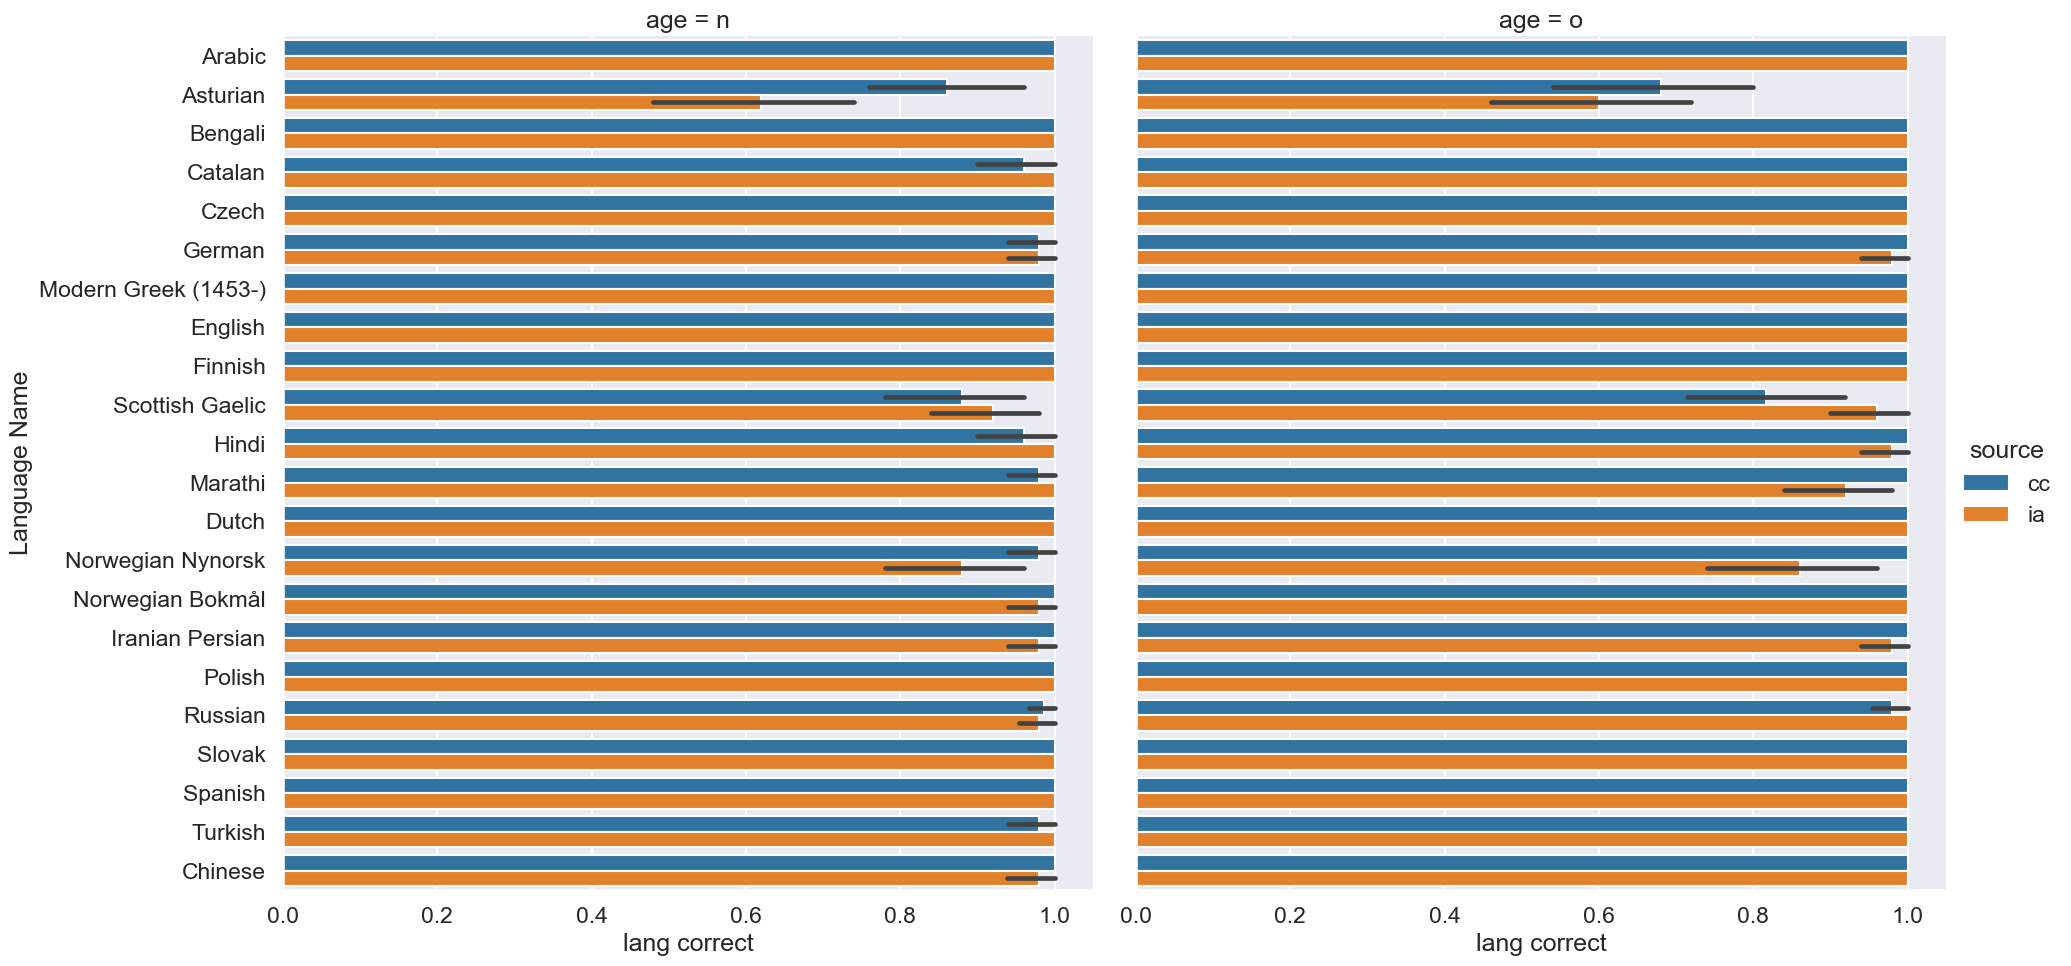

In [18]:
g = sns.catplot(data=df, y='Language Name', x='lang correct', hue='source',col='age',
                kind='bar', errorbar=('ci',95), height=10)

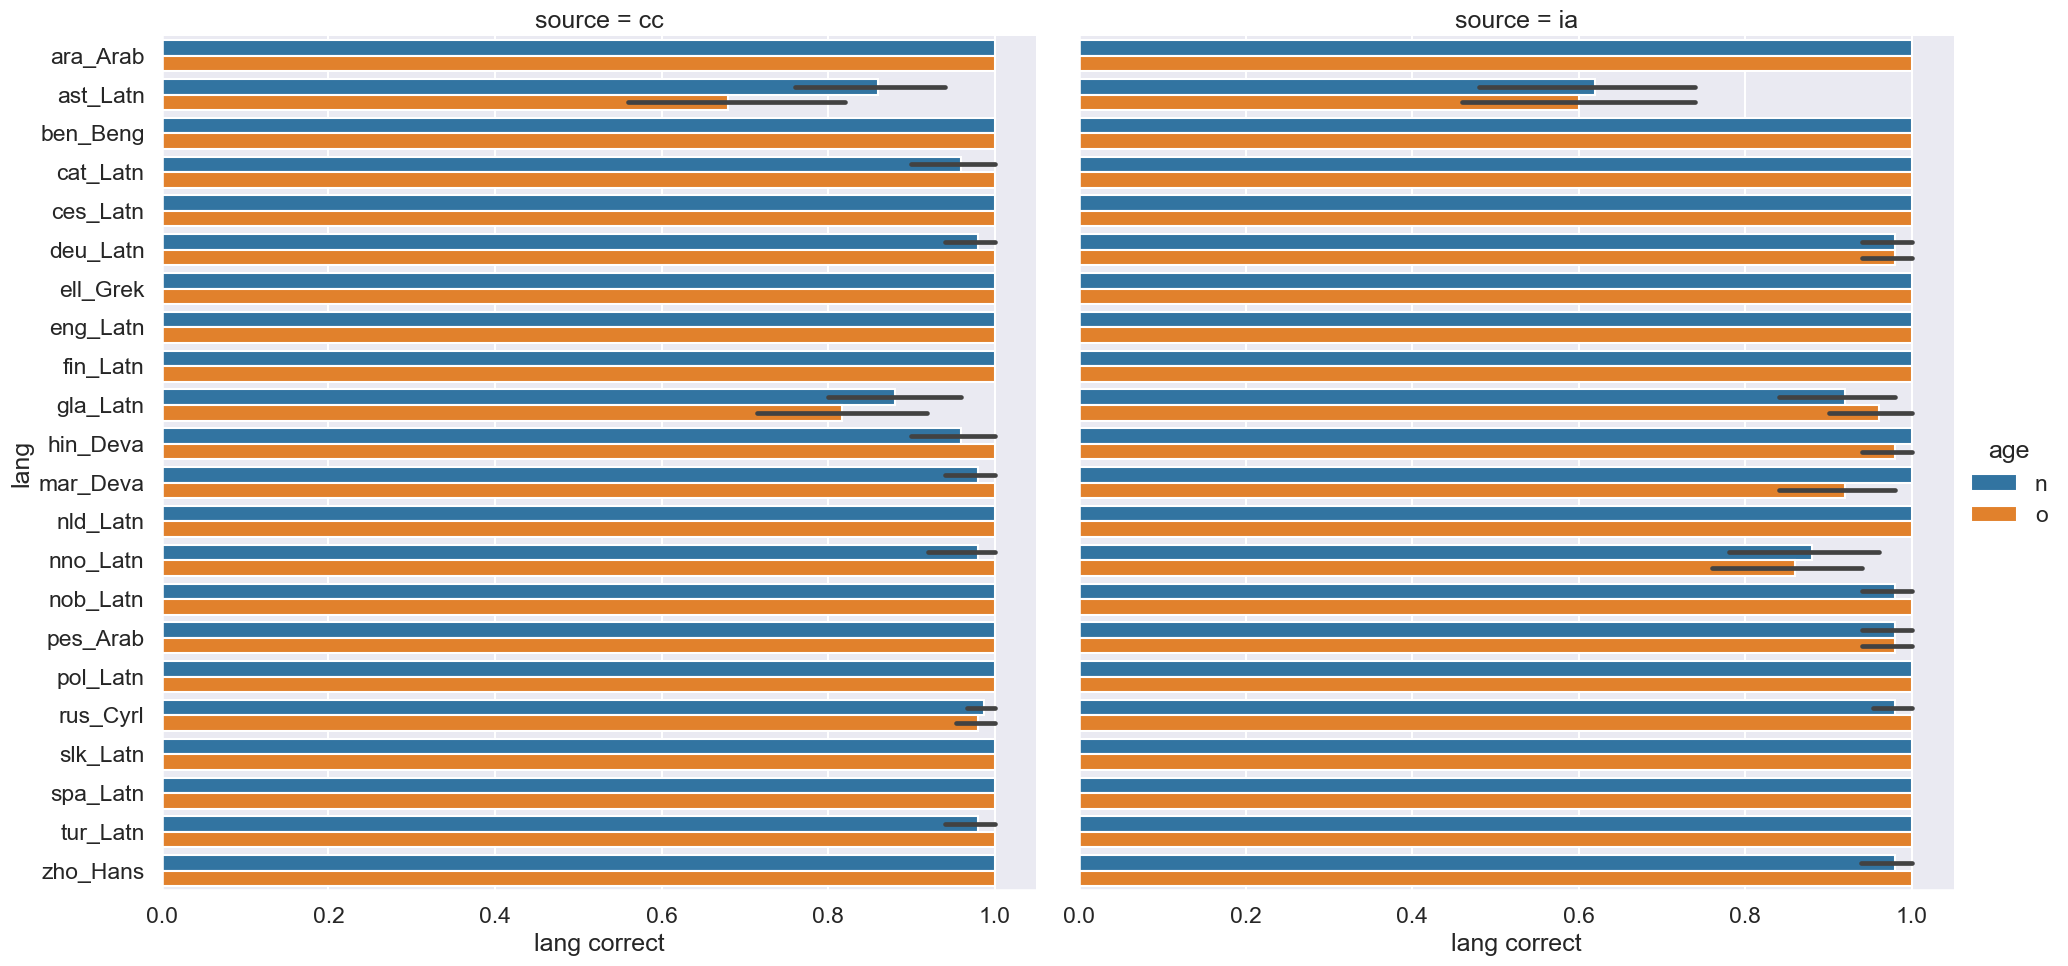

In [19]:
g = sns.catplot(data=df, y='lang', x='lang correct', col='source',hue='age',
                kind='bar', errorbar=('ci',95), height=10)

In [20]:
df['part'] = df.source+'_'+df.age
df = df.sort_values(by=['part','lang'], ascending=[False,True])  # lexicographic order will be o(ld), n(ew)

In [21]:
alldf = df.copy()
alldf['lang'] = 'TOTAL'
df1 = pd.concat([df,alldf], ignore_index=True)

In [22]:
df1['language'] = df1.lang.str.replace('_',' ')

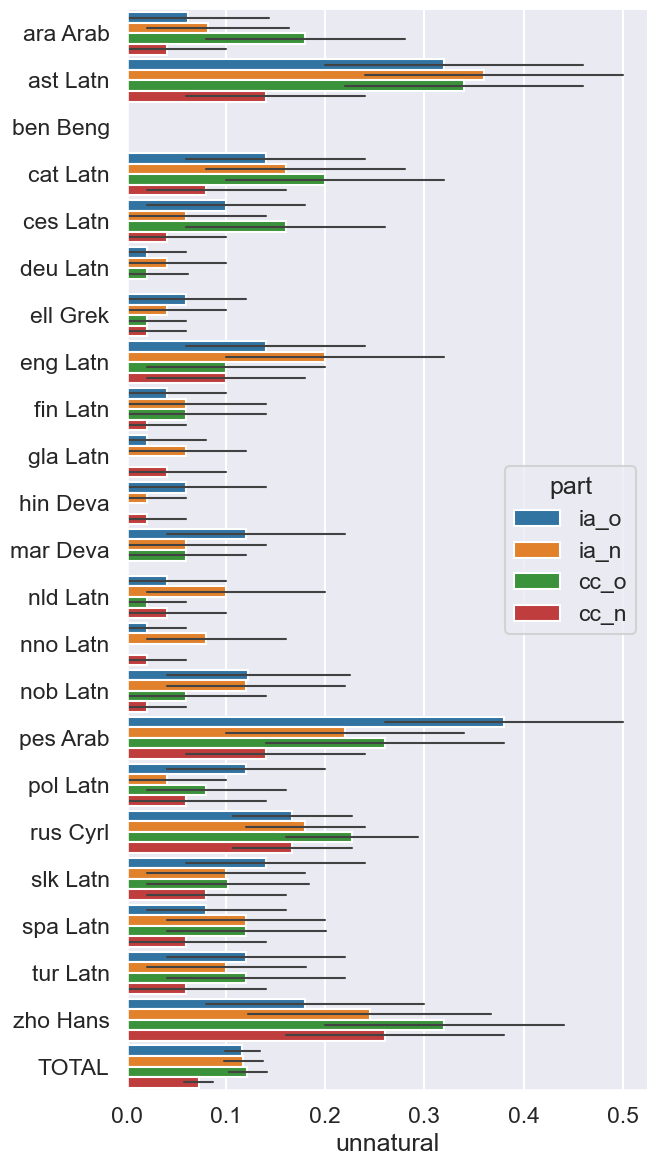

In [23]:

with sns.plotting_context('talk'):
    g = sns.catplot(data=df1, 
                    y='language', x='unnatural', hue='part',
                    kind='bar', errorbar=('ci',95), height=12, aspect=0.6,width=0.9,
                    err_kws={'linewidth':1.5}, legend_out=False)
    g.set(ylabel=None)
    g.savefig('paper/unnatural_4groups_perlang_aspect0.6.pdf')

In [28]:
!open .

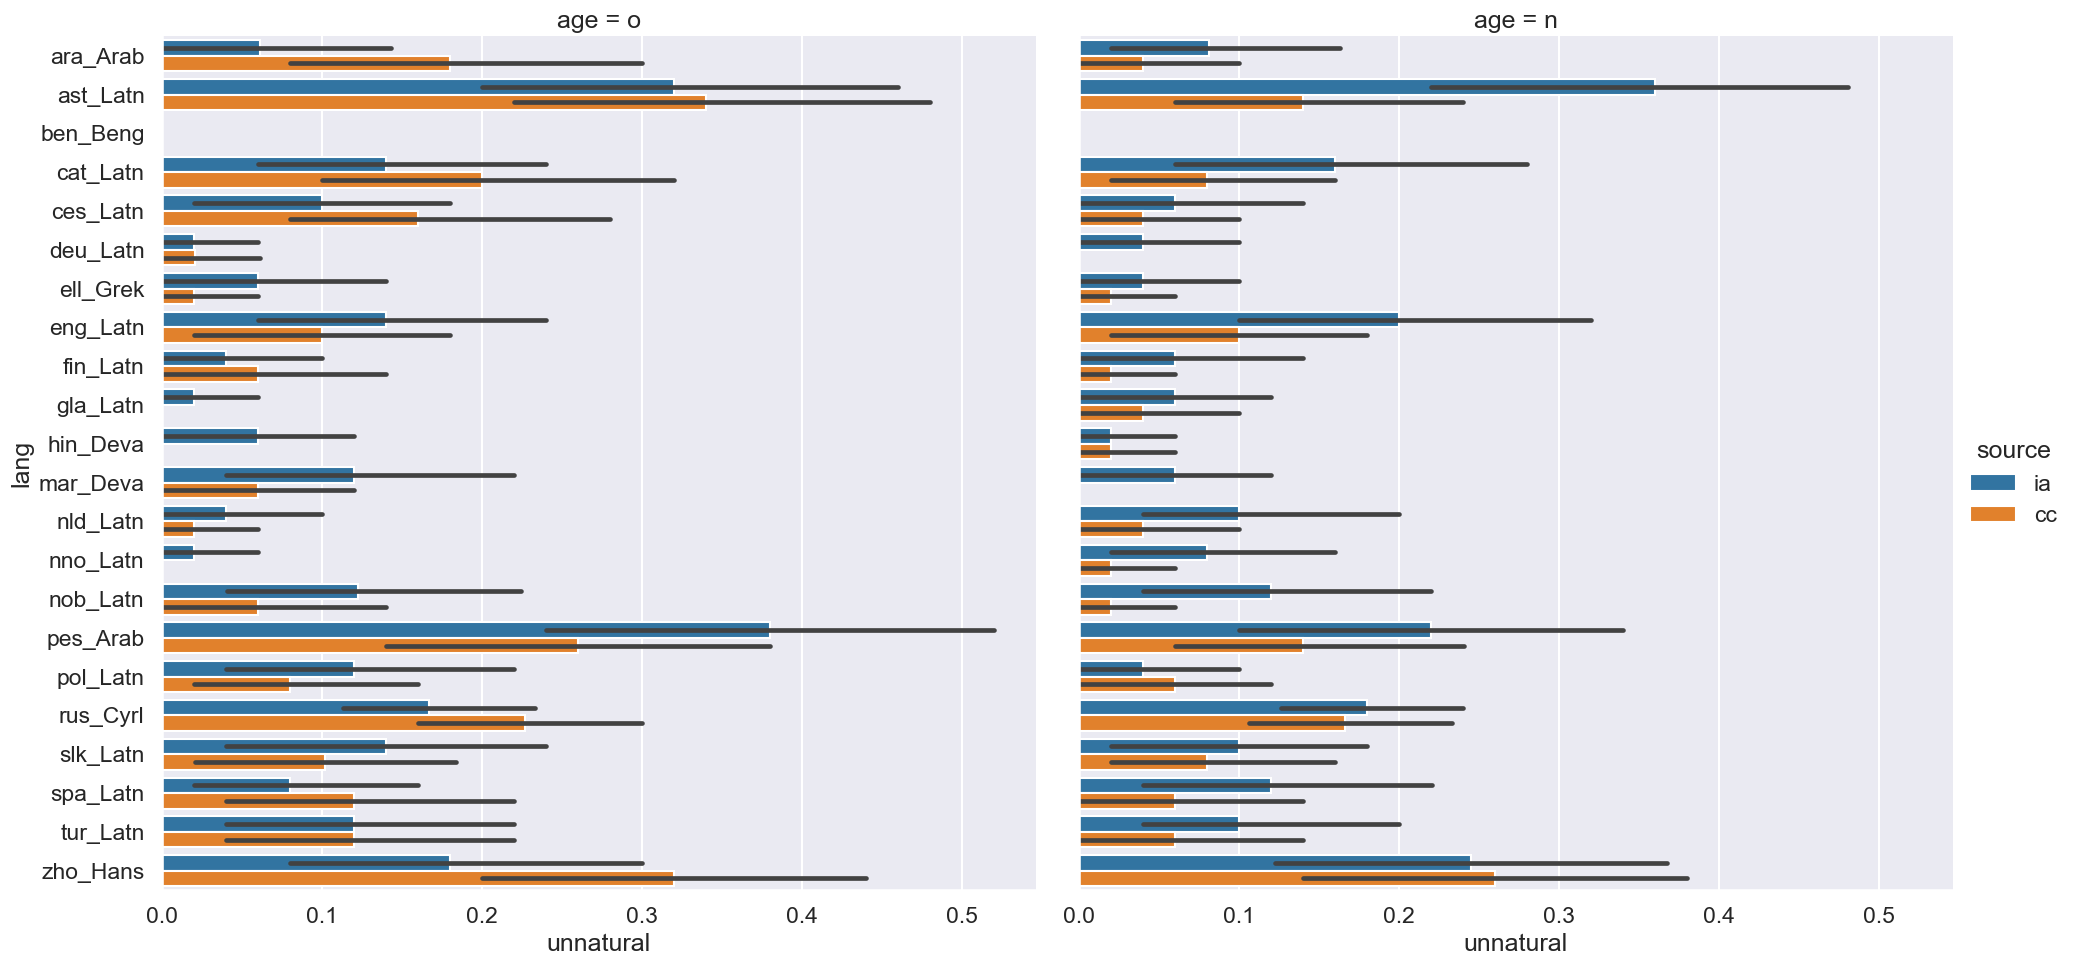

In [24]:
g = sns.catplot(data=df, y='lang', x='unnatural', hue='source',col='age',
                kind='bar', errorbar=('ci',95), height=10)

In the "new" group, IA seems to contain more unnatural texts than CC (stat. sign.?)

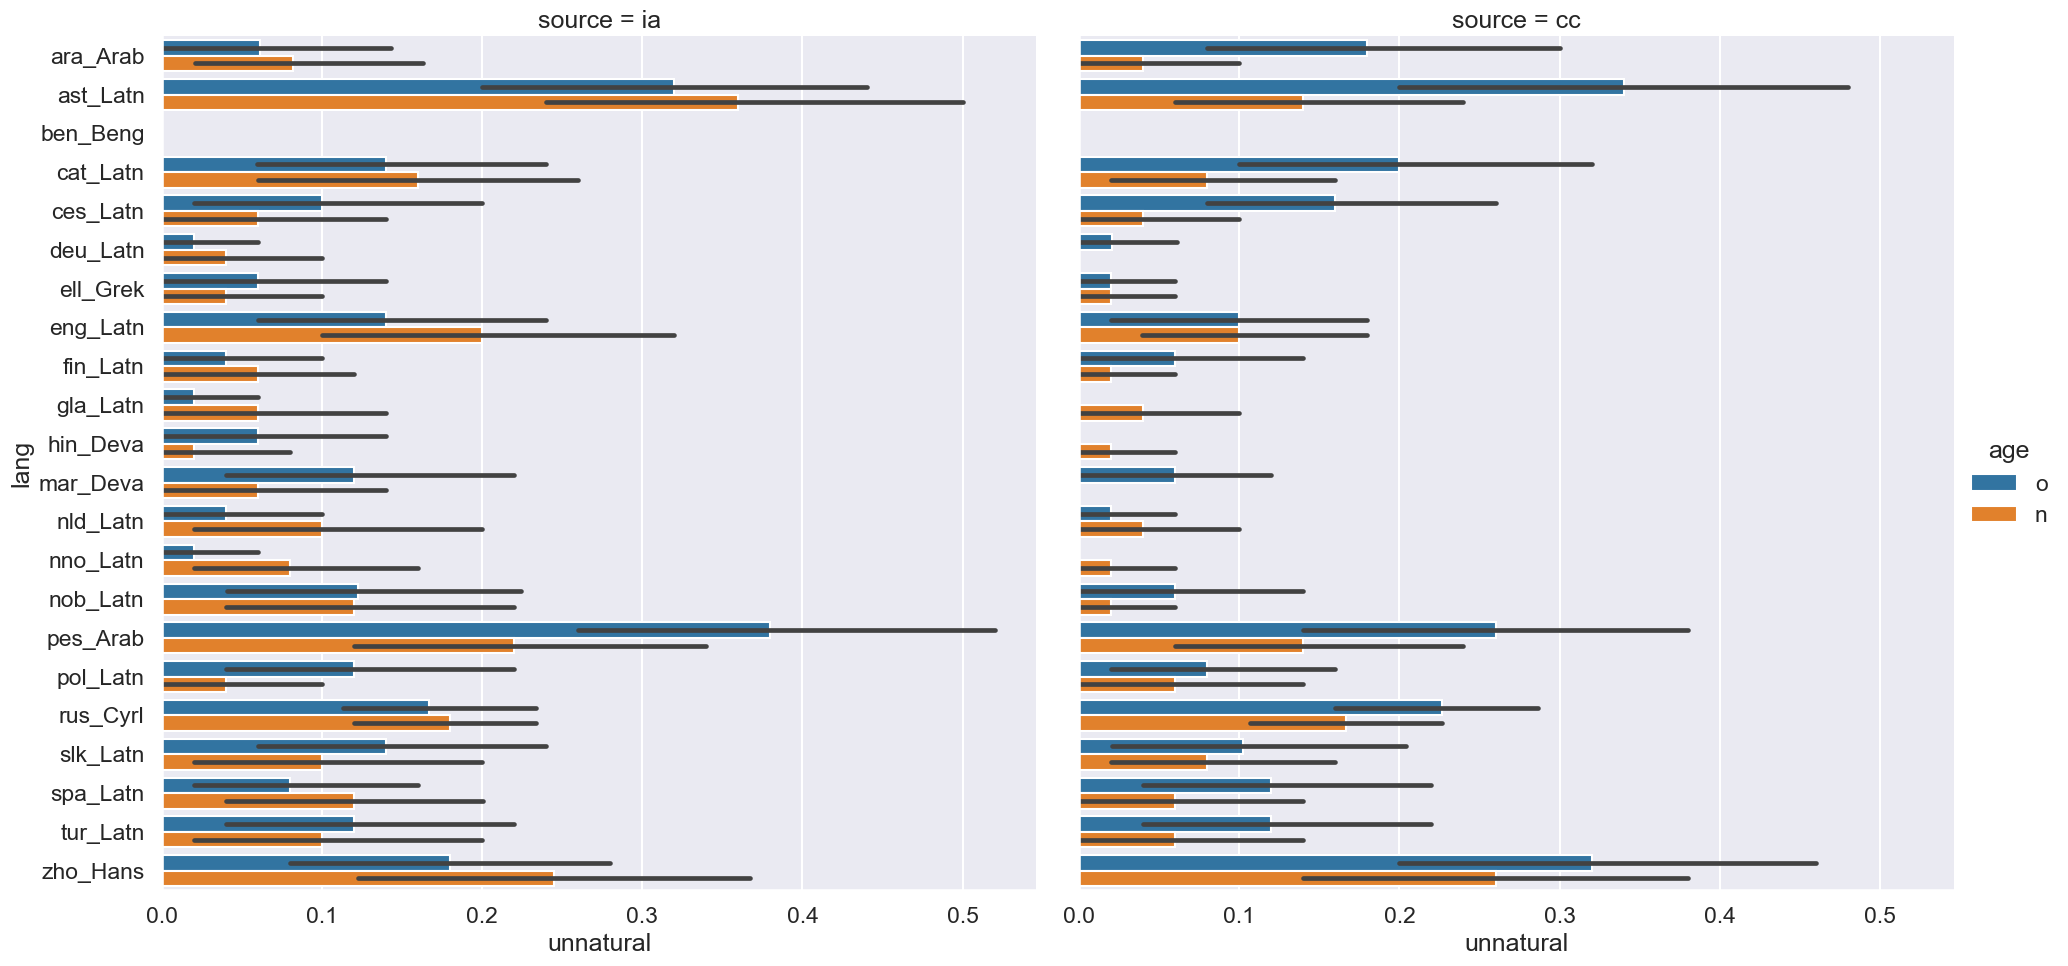

In [25]:
g = sns.catplot(data=df, y='lang', x='unnatural', hue='age',col='source',
                kind='bar', errorbar=('ci',95), height=10)

New CC seems to contain less unnatural texts compared to the old CC for most languages, though the difference is not stat. significant for each language separately.

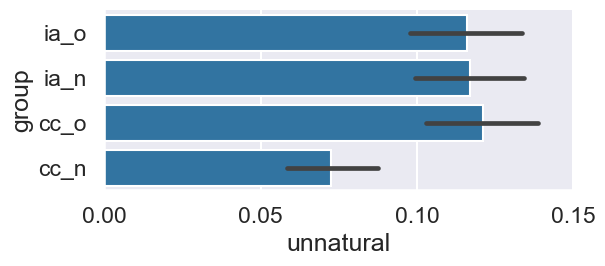

In [26]:
g = sns.catplot(data=df, x='unnatural',y='group',
                kind='bar', errorbar=('ci',95), height=3, aspect=2.0)
g.set(xticks=[0.05*i for i in range(4)])
g.savefig('paper/unnatural_4groups.pdf')

New CC seems to contain less unnatural texts compared to the old CC and both old and new IA (notice the plot is not re-weighted according to the language proportions)!

# Where texts from different languages mostly come from?

In [25]:
def load_crawl_sizes():
    wdf = pd.concat([pd.read_csv(f'../warc2text-runner/two/{dc}/crawls.stat', sep='\t', header=None) 
                     for dc in ('nirdl','cesnet')], ignore_index=True)
    wdf[2] = wdf[2].str.split('/').str[-1]
    wdf[1] = wdf[1].str.replace('G','').str.replace('T','000').astype(int)
    wdf = wdf.groupby(2)[1].max()  # 2 CC crawls have both full and 1% sample versions, take the full size 
    wdf = wdf.reset_index(name='GB').rename(columns={2:'crawl'})
    return wdf

In [26]:
def crawl2collection(cdf):
    cdf = cdf.str.replace('CC-MAIN-20(?P<y>\d{2})-.*','cc\g<y>', regex=True)
    cdf = cdf.str.replace('_partial','').str.replace('(?P<t>[^0-9])_?0+','\g<t>', regex=True)
    return cdf

In [27]:
wdf = load_crawl_sizes()
wdf['collection'] = crawl2collection(wdf.crawl)
wdf['group'] = wdf.collection.apply(lambda c: coll2group[c])
group_sizes = wdf.groupby('group')['GB'].sum()
print('', group_sizes.sum())
wdf = group_sizes/group_sizes.sum()
wdf

 4448547


group
cc_m             0.014419
cc_n             0.059503
cc_o             0.022466
cc_r             0.080646
ia_archivebot    0.060919
ia_m             0.181408
ia_n             0.316733
ia_o             0.242776
ia_survey        0.021130
Name: GB, dtype: float64

Among raw crawls used for the 2nd release:
* ia_n crawls (wide16 + wide17) is 32% 
* cc_n, cc_r are 6-8%
* ArchiveBot is 6%.

In [28]:
mdfs = []

for stage, stage_name in zip(('html_stage2','cleaned'),('2:raw text', '3:deduped&cleaned')):
    mdf = pd.read_csv(f'../warc2text-runner/stats/release2.0_{stage}_stats_mr/stats.tsv', 
                      sep='\t', header=None, names='index segments wcwords chars docs'.split())
    mdf['stage'] = stage_name
    mdfs.append(mdf)
mdf = pd.concat(mdfs, ignore_index=True)
mdf.head()

,index,segments,wcwords,chars,docs,stage
0,"CC-MAIN-2013-20_partial,ace_Arab",350.0,1376.0,8027.0,7.0,2:raw text
1,"CC-MAIN-2013-20_partial,ace_Latn",50668.0,161737.0,1106109.0,2701.0,2:raw text
2,"CC-MAIN-2013-20_partial,afr_Latn",222636.0,1421348.0,8131807.0,13283.0,2:raw text
3,"CC-MAIN-2013-20_partial,als_Latn",52410.0,801974.0,4770640.0,2853.0,2:raw text
4,"CC-MAIN-2013-20_partial,amh_Ethi",132049.0,951765.0,6593191.0,13125.0,2:raw text


In [29]:
# unpack 'index' into collection/crawl and lang
mdf[['collection','lang']] = mdf['index'].str.split(',', expand=True)
mdf.drop(columns='index', inplace=True)
mdf.collection = crawl2collection(mdf.collection)  # convert crawl to collection for html_stage2
mdf.collection.value_counts()

collection
cc18          2512
cc17          2508
cc19          2508
cc15          2107
cc20          1929
cc21          1927
cc16          1912
cc14          1723
cc22          1352
cc23           955
cc13           556
wide16         385
wide5          384
wide11         384
wide12         384
wide15         384
wide17         384
survey3        383
wide10         380
archivebot     379
wide6          377
Name: count, dtype: int64

In [30]:
mdf['group'] = mdf.collection.apply(lambda c: coll2group[c])  # annotate collection groups
assert mdf.group.isnull().sum()==0
mdf.head()

,segments,wcwords,chars,docs,stage,collection,lang,group
0,350.0,1376.0,8027.0,7.0,2:raw text,cc13,ace_Arab,cc_o
1,50668.0,161737.0,1106109.0,2701.0,2:raw text,cc13,ace_Latn,cc_o
2,222636.0,1421348.0,8131807.0,13283.0,2:raw text,cc13,afr_Latn,cc_o
3,52410.0,801974.0,4770640.0,2853.0,2:raw text,cc13,als_Latn,cc_o
4,132049.0,951765.0,6593191.0,13125.0,2:raw text,cc13,amh_Ethi,cc_o


In [31]:
# Proportions of extracted texts per group, for each stage separately
gdf = mdf.groupby(['stage','group']).sum(numeric_only=True)
gdf = gdf.groupby('stage').transform(lambda r: r/r.sum() if is_numeric_dtype(r) else r)
gdf

segments   wcwords     chars      docs
stage             group                                                
2:raw text        cc_m           0.036269  0.050544  0.045231  0.036620
                  cc_n           0.131958  0.171626  0.165089  0.125594
                  cc_o           0.060108  0.087388  0.078349  0.062508
                  cc_r           0.124239  0.187575  0.193901  0.124276
                  ia_archivebot  0.007379  0.009888  0.009403  0.010095
                  ia_m           0.175681  0.146371  0.146115  0.146704
                  ia_n           0.231950  0.155994  0.166937  0.260096
                  ia_o           0.228588  0.184884  0.188805  0.228017
                  ia_survey      0.003828  0.005730  0.006171  0.006090
3:deduped&cleaned cc_m           0.033933  0.041084  0.036900  0.032413
                  cc_n           0.224541  0.255944  0.247893  0.249451
                  cc_o           0.033228  0.039485  0.035337  0.031892
                  cc_r           0.252270  0.304379  0.294942  0.279958
                  ia_archivebot  0.006959  0.007524  0.007015  0.006612
                  ia_m           0.153272  0.130195  0.134158  0.138383
                  ia_n           0.130043  0.091667  0.109241  0.120023
                  ia_o           0.158553  0.121121  0.126081  0.133165
                  ia_survey      0.007201  0.008601  0.008434  0.008102

In [32]:
wdf

group
cc_m             0.014419
cc_n             0.059503
cc_o             0.022466
cc_r             0.080646
ia_archivebot    0.060919
ia_m             0.181408
ia_n             0.316733
ia_o             0.242776
ia_survey        0.021130
Name: GB, dtype: float64

In [33]:
wdf1 = wdf.reset_index().melt(id_vars='group', value_vars='GB', value_name='prop', var_name='quantity')
wdf1['stage'] = '1:crawls'
gdf1 = gdf.reset_index().melt(id_vars=['stage','group'],value_vars=['docs','chars'], value_name='prop', var_name='quantity')

pdf = pd.concat([wdf1,gdf1], ignore_index=True)

In [34]:
pdf['crawl_type'] = pdf.group.str.split('_').str[0]

totaldf = pdf.groupby(['stage','crawl_type','quantity']).agg({'group':'first','prop':'sum'}).reset_index()
totaldf

totaldf['group'] = 'TOTAL_' + totaldf.crawl_type

pdf = pd.concat([pdf, totaldf], ignore_index=True)
pdf

,group,quantity,prop,stage,crawl_type
0,cc_m,GB,0.014419,1:crawls,cc
1,cc_n,GB,0.059503,1:crawls,cc
2,cc_o,GB,0.022466,1:crawls,cc
3,cc_r,GB,0.080646,1:crawls,cc
4,ia_archivebot,GB,0.060919,1:crawls,ia
5,ia_m,GB,0.181408,1:crawls,ia
6,ia_n,GB,0.316733,1:crawls,ia
7,ia_o,GB,0.242776,1:crawls,ia
8,ia_survey,GB,0.021130,1:crawls,ia
9,cc_m,docs,0.036620,2:raw text,cc


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


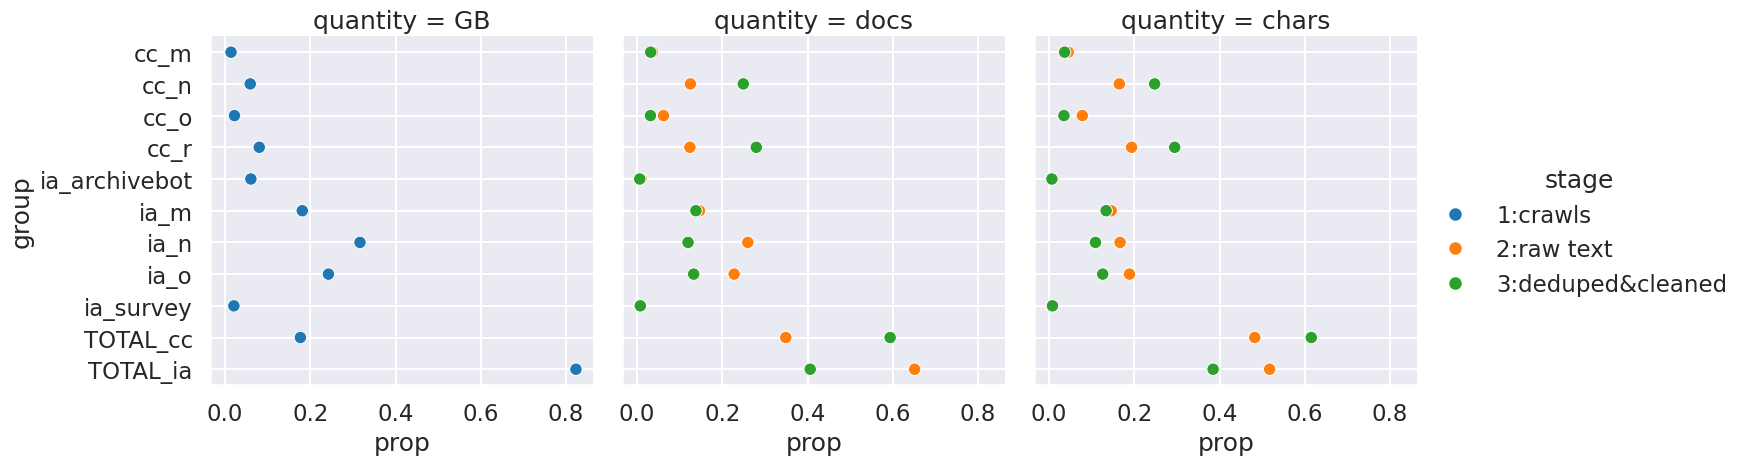

In [35]:
g = sns.relplot(data=pdf, y='group', x='prop', hue='stage', col='quantity')
g.savefig('plots/group-contribs.pdf')

ia_n is 32% of raw crawls, but contributes to 11-12% of texts (both in docs and chars) in the cleaned version. Similar disproportion for other IA crawls.

cc_r is 8% of raw crawls, but contributes to 28-30% of texts (both in docs and chars) in the cleaned version. Similarly for cc_n. 

The proportions of texts extracted from cc_r, cc_n crawls significantly increase between html_stage2 and cleaned versions, for IA they decrease (ia_n, ia_o) or remain the same (compare orange and greed dots).

In [36]:
pdf = pdf.sort_values(by='stage')

In [37]:
np.linspace(0.2, 1, 4)

array([0.2       , 0.46666667, 0.73333333, 1.        ])

In [38]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

groups_colors = [(f'{t}_{age}', cm(0.2+a*0.3)) for t, cm in zip(('cc','ia'),(plt.cm.Reds, plt.cm.Blues)) 
                  for a,age in enumerate('rnmo')]
groups_colors = [(g,c) for g,c in groups_colors if g in pdf.group.unique()]
groups_colors += [() for g,c in zip()]
groups, colors = list(zip(*groups_colors))
groups += tuple(g for g in pdf.group.unique() if g not in groups and not g.startswith('TOTAL'))
colors += tuple(mcolors.to_rgba(c) for c in ('yellow', 'yellowgreen'))


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


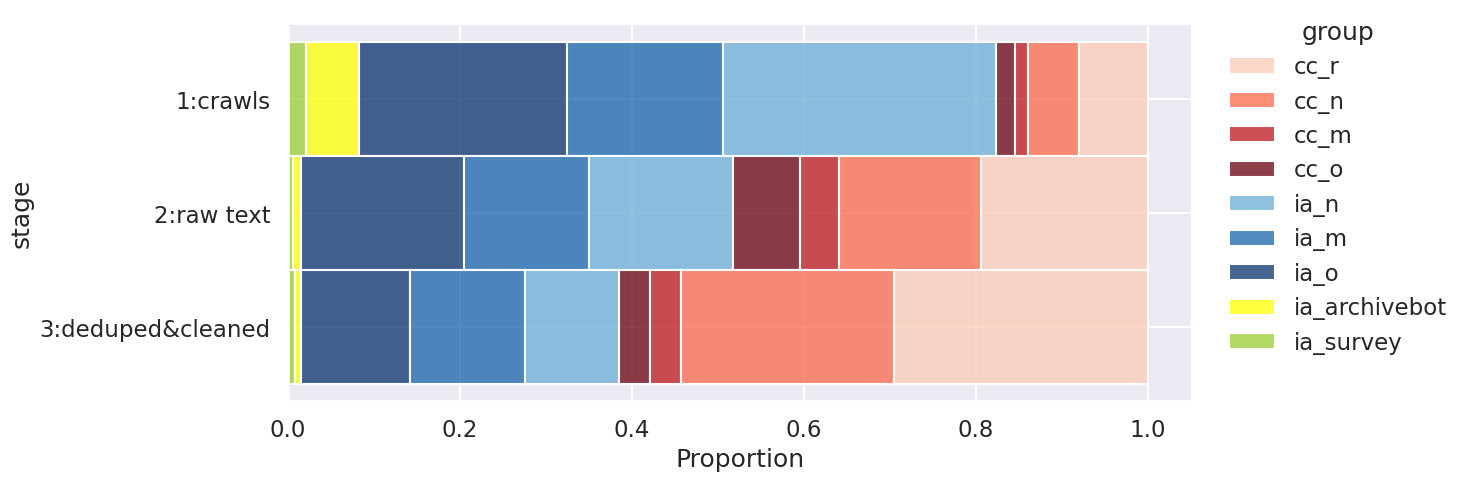

In [39]:
g = sns.displot(pdf.query("quantity!='docs' & ~group.str.startswith('TOTAL')"), 
                y='stage', hue='group', weights='prop', multiple='stack', hue_order=groups,
                 palette=colors,legend=True, aspect=2.5)
g.set(xlabel='Proportion')
sns.move_legend(g, 'upper right')
g.savefig('paper/stages_groups_proportions.pdf')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


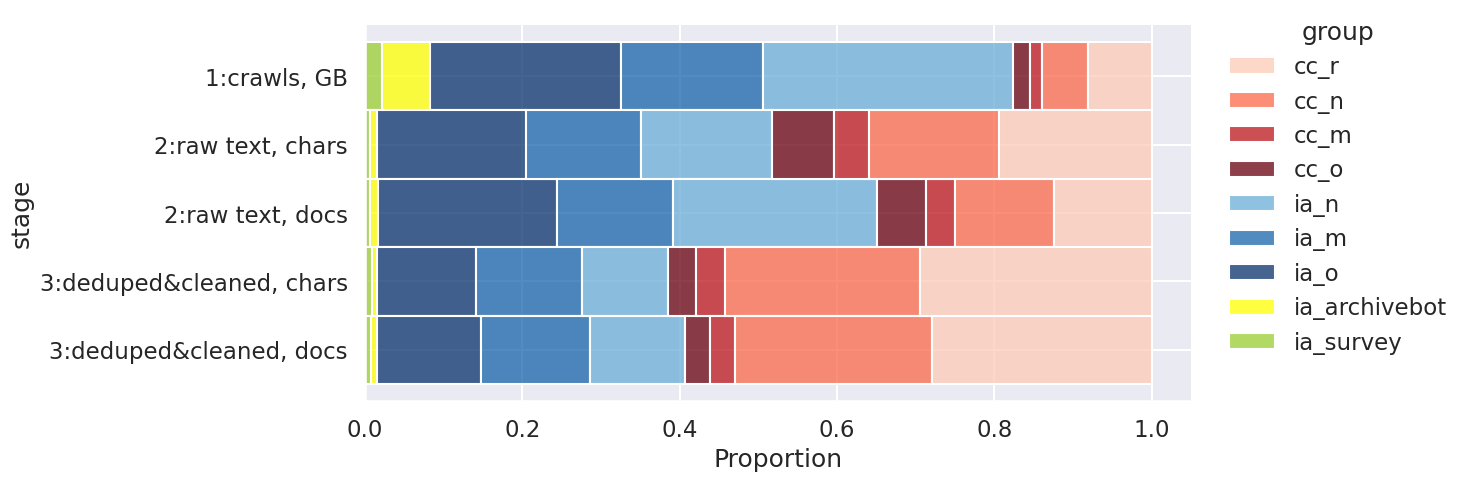

In [40]:
pdf1 = pdf.copy()
pdf1['stage'] = pdf1.stage+', '+pdf1.quantity
pdf1 = pdf1.sort_values(by='stage')
g = sns.displot(pdf1.query("~group.str.startswith('TOTAL')"), 
                y='stage', hue='group', weights='prop', multiple='stack', hue_order=groups,
                 palette=colors,legend=True, aspect=2.5)
g.set(xlabel='Proportion')
sns.move_legend(g, 'upper right')
# g.savefig('paper/stages_groups_proportions.pdf')

In [41]:
mdf = mdf.groupby(['stage','group','lang']).sum(numeric_only=True)
mdf.head()

segments      wcwords         chars       docs
stage      group lang                                                      
2:raw text cc_m  ace_Arab     53054.0     406868.0  1.648335e+07     1349.0
                 ace_Latn  16691546.0   49254043.0  3.369627e+08  1133606.0
                 afr_Latn  62757394.0  298375958.0  1.738354e+09  3273123.0
                 als_Latn  15934083.0  250568564.0  1.506149e+09   613750.0
                 amh_Ethi  36733715.0  209778348.0  1.310600e+09  5144889.0

In [80]:
langs_sorted = mdf.loc['3:deduped&cleaned'].groupby('lang')['chars'].agg('sum').sort_values().index

pdf = mdf.groupby(['stage','lang']).transform(lambda r: r/r.sum()).reset_index()

pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()

pdf['style'] = pdf.group.apply(lambda s: s if s in ('ia_archivebot','ia_survey') else s.split('_')[0])

### proportions of texts (characters) coming from different crawl groups for each language

In [81]:
pdf['language'] = pdf.lang.str.replace('_',' ')

/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


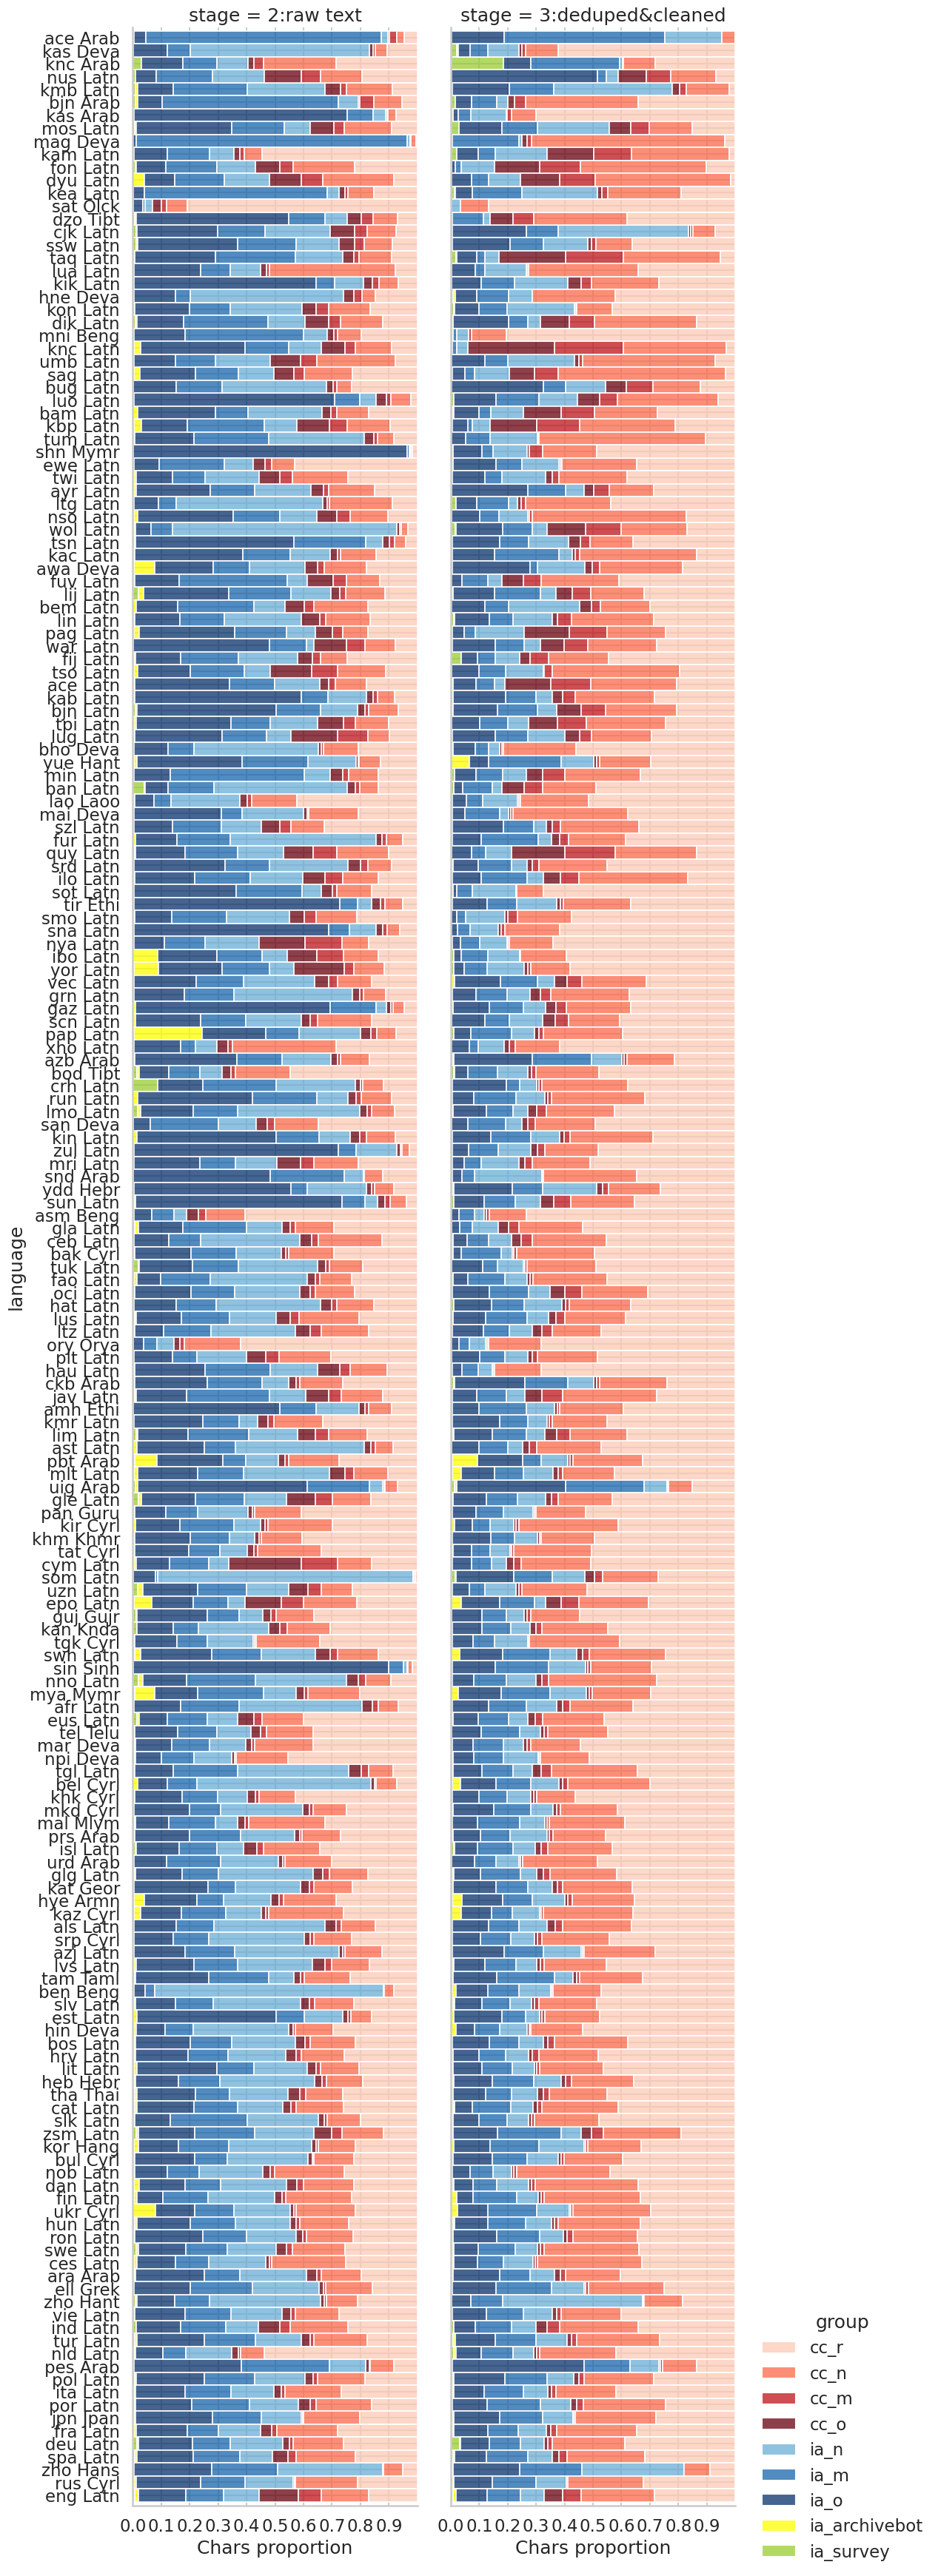

In [82]:

g = sns.displot(data=pdf, 
                y='language', hue='group', weights='chars',  multiple='stack', hue_order=groups,
                col='stage',palette=colors,legend=True, height=35, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.set(xmargin=0.0, ymargin=0.0015)
g.set(xlabel='Chars proportion')
sns.move_legend(g, 'lower right')
g.savefig('plots/group-contribs-perlang-chars-stacked.pdf')

In [148]:
np.random.seed=2025
random_langs = np.random.choice(pdf.lang.unique(), size=30,)

In [226]:
langs_ia_contrib = pdf.query('stage.str.startswith("3") &  group.str.startswith("ia_")').groupby('lang').chars.sum().sort_values()

In [235]:
for stage in pdf.stage.unique():
    print((pdf[pdf.stage==stage].query('group.str.startswith("ia_")').groupby('lang').chars.sum() > 0.7).sum())

49
6


/home/nikolare/anaconda3/envs/jupyterai/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


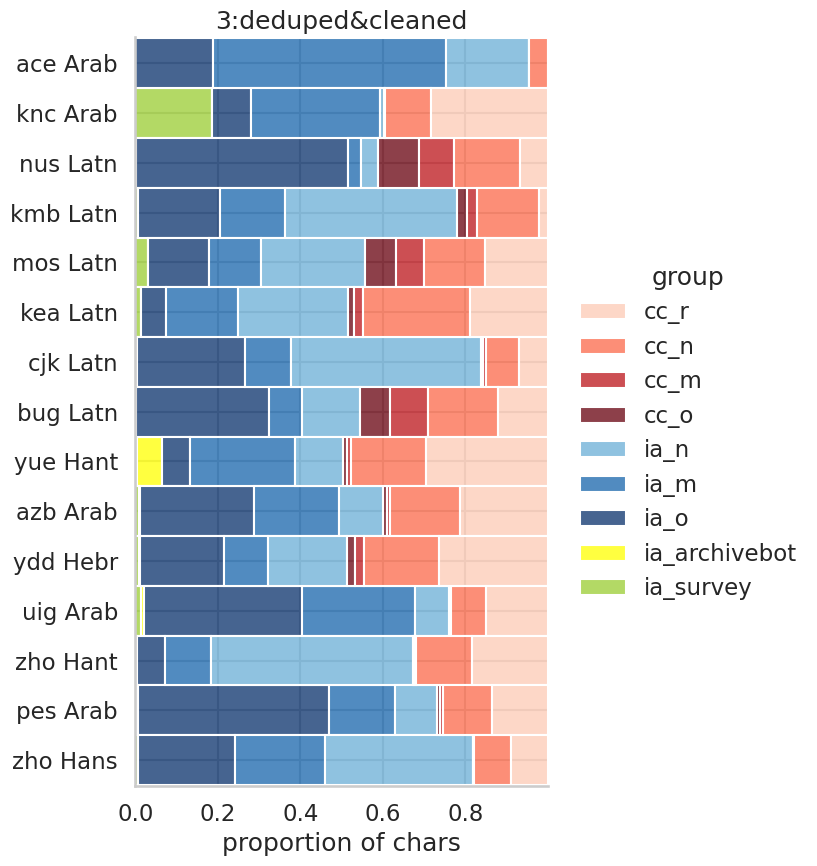

In [227]:
sns.set_style('whitegrid')
sns.set_context('talk')
g = sns.displot(data=pdf[pdf.lang.isin(langs_ia_contrib.index[-15:])].query('stage.str.startswith("3")'), 
                y='language', hue='group', weights='chars',  multiple='stack', hue_order=groups,
                col='stage',palette=colors,legend=True, height=9, aspect=0.7)
g.set(xticks=[0.2*i for i in range(5)])
g.set(xmargin=0.0, ymargin=0.0015)
g.set(xlabel='proportion of chars') 
g.set(ylabel=None) 

for ax in g.axes.flatten():
    ax.set_title(ax.get_title().replace('stage = ',''))
# sns.move_legend(g, 'lower right', bbox_to_anchor=(0.70,0.1))
# g.legend.get_frame().set_visible(True)
g.savefig('paper/group-contribs-perlang-chars-stacked-largest_cc_contrib.pdf')

In [ ]:
# proportions of texts (characters) coming from different crawl groups for each language
g = sns.relplot(data=pdf, y='lang', x='chars', hue='group', kind='scatter', 
                style='style', col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-chars.pdf')

### proportions of documents coming from different crawl groups for each language

In [ ]:

g = sns.displot(data=pdf, y='lang', hue='group', weights='docs',  multiple='stack', hue_order=groups,
                col='stage',palette=colors,legend=True, height=35, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.set(xmargin=0.0, ymargin=0.0015)
g.set(xlabel='Docs proportion')
sns.move_legend(g, 'upper right')
g.savefig('plots/group-contribs-perlang-docs-stacked.pdf')

In [ ]:

g = sns.relplot(data=pdf, y='lang', x='docs', hue='group', kind='scatter', 
                style='style', col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-docs.pdf')

In [ ]:
# which languages a large proportion of characters comes from archive bot?
g = sns.relplot(data=pdf[pdf['group'].str.startswith('ia_arch')], y='lang', x='chars', hue='group', kind='scatter', 
                style='style', hue_order=pdf['group'].unique(), style_order=pdf['style'].unique(), col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])

We have 7% of ArchiveBot, can increase by 15x. This will give 
+10% * (15-1) = +140% of pbt_Arab, 
+3-5% * (15-1) = +40-70% for ~10 other languages,
much less for most languages.

In [ ]:
# which languages a large proportion of characters comes from IA crawls?
g = sns.relplot(data=pdf[pdf['group'].str.startswith('ia_')], y='lang', x='chars', hue='group', kind='scatter', 
                style='style', hue_order=pdf['group'].unique(), style_order=pdf['style'].unique(), col='stage',
           height=50, aspect=0.15)
g.set(xticks=[0.1*i for i in range(10)])
g.savefig('plots/group-contribs-perlang-chars-iaonly.pdf')

# Yields

In [ ]:
group_sizes

In [ ]:
gdf = mdf.reset_index().groupby(['stage','group']).sum(numeric_only=True)
gdf

In [ ]:
pdf = gdf.groupby('stage').transform(lambda r: r/group_sizes)
pdf

In [ ]:
pdf = pdf.reset_index().melt(id_vars=['stage','group'], value_vars=['chars','docs'], 
                             var_name='quantity',value_name='yield')

In [ ]:
g = sns.relplot(data=pdf, y='group', x='yield', hue='stage', col='quantity')
g.set(xscale='log')

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Chars/docs of extracted text per 1 GB of raw compressed crawls')

In [ ]:
sns.set_context('talk')
g = sns.relplot(data=pdf, y='group', x='yield', hue='stage', col='quantity',facet_kws={'sharex':False},
               aspect=1.3, legend=True)
g.set(xscale='log')
g.set(xticks=[2**i for i in range(8,30)], xticklabels=[f'$2^{{{i}}}$' if i%2==0 else '' for i in range(8,30)])
g.fig.subplots_adjust(top=0.8)
g.set(ylabel=None)
# g.fig.suptitle('Chars/docs of extracted text per 1 GB of raw compressed crawls')

# Set individual x-axis limits for each subplot
g.set(xlim=(0, 60))  # Set a common limit first (optional)
g.axes[0, 0].set_xlim(2**19, 2**28)  # Set x limits for the first subplot
g.axes[0, 1].set_xlim(2**7, 2**17)  # Set x limits for the second subplot
# sns.move_legend(g,'lower center', bbox_to_anchor=(0.5,0.99))
# g.legend.get_frame().set_visible(True)
g.savefig('plots/group-yields.pdf')

In [ ]:
g=sns.relplot(data=pdf.query('quantity=="chars"'), y='group', x='yield', hue='stage', 
               aspect=1.5)
g.set(xscale='log')
g.set(xticks=[2**i for i in range(19,28)], xticklabels=[f'$2^{{{i}}}$' for i in range(19,28)])
g.fig.subplots_adjust(top=0.8)
g.set(ylabel=None)

sns.move_legend(g,'upper center', bbox_to_anchor=(0.5,1.05))
# g.legend.get_frame().set_visible(True)
g.savefig('paper/group-yields.pdf')

In [ ]:
pdf

In [ ]:
wdf = load_crawl_sizes()
wdf

### Yields for each language

In [ ]:
gdf = mdf.reset_index().groupby(['stage','group','lang']).sum(numeric_only=True)
gdf

In [ ]:
sns.set_context('notebook')

import math
base=2
for quantity in ('docs', 'chars'):
    pdf = gdf.groupby(['stage','lang']).transform(lambda r: r/group_sizes)
    pdf = pdf.reset_index().melt(id_vars=['stage','group','lang'], value_vars=[quantity], 
                                 var_name='quantity',value_name='yield')
    pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()
    pdf['crawl_type'] = pdf.group.str.split('_').str[0]
    max_pow = int(math.log(pdf['yield'].max(), base)+1)
    min_pow = int(math.log(pdf[pdf['yield'] > 0]['yield'].min(), base))
    print(min_pow, max_pow)
    
    g = sns.relplot(data=pdf[pdf.quantity==quantity], 
                    y='lang', x='yield', hue='group', col='stage', style='crawl_type',
                   height=35, aspect=0.2)
    g.set(xscale='log')
    g.set(xticks=[base**i for i in range(min_pow, max_pow)], 
          xticklabels=[f'${base}^{{{i}}}$' if i%2 else '' for i in range(min_pow, max_pow)])
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{quantity} of extracted text per 1 GB of raw compressed crawls')
    g.savefig(f'plots/group-yields-perlang-{quantity}.pdf')

In [ ]:
pdf

# Prediction for it3

In [ ]:
new_group_sizes = group_sizes.copy()
new_group_sizes

In [ ]:
new_group_sizes.loc[new_group_sizes.index.str.startswith('cc')] *= 2.5  # +15 random CC crawls to the previous 10
new_group_sizes

In [ ]:
add_group_sizes = pd.Series({
    'ia_archivebot':5.0*10**6, 
    'cc_r':2.0*10**6
})

In [ ]:
new_group_sizes.loc[add_group_sizes.index] += add_group_sizes
new_group_sizes

In [ ]:
sns.set_context('notebook')

import math
base=2
for quantity in ('docs', 'chars'):
    pdf = gdf.groupby(['stage','lang']).transform(lambda r: r/group_sizes*new_group_sizes)
    pdf = pdf.reset_index().melt(id_vars=['stage','group','lang'], value_vars=[quantity], 
                                 var_name='quantity',value_name='yield')
    pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()
    pdf['crawl_type'] = pdf.group.str.split('_').str[0]
    max_pow = int(math.log(pdf['yield'].max(), base)+1)
    min_pow = int(math.log(pdf[pdf['yield'] > 0]['yield'].min(), base))
    print(min_pow, max_pow)
    
    g = sns.relplot(data=pdf[pdf.quantity==quantity], 
                    y='lang', x='yield', hue='group', col='stage', style='crawl_type',
                   height=35, aspect=0.2)
    g.set(xscale='log')
    g.set(xticks=[base**i for i in range(min_pow, max_pow)], 
          xticklabels=[f'${base}^{{{i}}}$' if i%2 else '' for i in range(min_pow, max_pow)])
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{quantity} of extracted text')
    g.savefig(f'plots/it3-pred-perlang-{quantity}.pdf')

In [ ]:
pdf

### For which languages full archivebot can contribute significantly?

In [ ]:
sns.set_context('notebook')

import math
base=2
for quantity in ('docs', 'chars'):
    pdf = gdf.groupby(['stage','lang']).transform(lambda r: r/group_sizes*new_group_sizes)
    pdf = pdf.reset_index().melt(id_vars=['stage','group','lang'], value_vars=[quantity], 
                                 var_name='quantity',value_name='yield')
    pdf = pdf.set_index('lang').loc[langs_sorted].reset_index()
    pdf['crawl_type'] = pdf.group.str.split('_').str[0]

    pdf['prop-per-lang'] = pdf.groupby(['stage','lang'])['yield'].transform(lambda q: q/q.sum())
    langs = pdf[(pdf.group=='ia_archivebot')&(pdf['prop-per-lang']>0.2)].lang.unique()    
    pdf = pdf[pdf.lang.isin(langs)]
    
#     max_pow = int(math.log(pdf['yield'].max(), base)+1)
#     min_pow = int(math.log(pdf[pdf['yield'] > 0]['yield'].min(), base))
#     print(min_pow, max_pow)
    
    g = sns.relplot(data=pdf[pdf.quantity==quantity], 
                    y='lang', x='prop-per-lang', hue='group', col='stage', style='crawl_type',
                   height=35, aspect=0.2)
#     g.set(xscale='log')
#     g.set(xticks=[base**i for i in range(min_pow, max_pow)], 
#           xticklabels=[f'${base}^{{{i}}}$' if i%2 else '' for i in range(min_pow, max_pow)])
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{quantity} of extracted text')
    g.savefig(f'plots/fullarchivebot-it3-pred-perlang-{quantity}.pdf')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = sns.load_dataset("car_crashes")


sns.set_style("whitegrid")
sns.displot(kind='scatter',
    data=data,
    x='alcohol',
    y='abbrev',
    size='ins_losses',
    legend=False,
)
plt.margins(0.dd0015, tight=True)
plt.show()
